In [1]:
from rdkit.Chem import AllChem as Chem
import pandas as pd
import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
import seaborn as sns
from matplotlib import pyplot as plt
%run ../utils/utils.py

In [65]:
suppl = Chem.SDMolSupplier("../data/high_fidelity/Enamine_High_Fidelity_Fragment_Library_plated_1920cmds_20210718.sdf")

In [66]:
smiles = []
for mol in suppl:
    smiles.append(Chem.MolToSmiles(mol))

In [67]:
smiles

['Cc1cc(F)c(C(=O)O)c(F)c1',
 'O=C1CC(CO)(c2ccccc2)CN1',
 'O=C1CCC(C(=O)O)(c2ccccc2)CN1',
 'C1COC2CCNCC2C1',
 'CC1(C)CCCCC1C(=O)O',
 'Nc1cc(C(F)(F)F)no1',
 'COC1(C)CC(N)C1(C)C',
 'Cn1nc(C2CC2)cc1N',
 'O=C(O)c1cnoc1C1CC1',
 'O=C1CC2(Cc3ccccc3C2)C(=O)N1',
 'O=C(O)CN1CCc2ccccc2C1=O',
 'Cn1ncc2cc(CC(=O)O)ccc21',
 'CCC(N)C1CCOCC1',
 'NC(=O)c1cccc(CO)c1',
 'Cc1nn(C)c(C)c1C1COCCN1',
 'Fc1ccc(C2CNCCO2)cc1Cl',
 'Nc1nc(C(F)(F)F)ns1',
 'OCc1nc(-c2ccc(F)cc2)no1',
 'OC1(C2CC2)CCNCC1',
 'O=C(O)c1cncc(F)c1',
 'CCNCc1cn(C)nn1',
 'O=C(O)c1cccc(C2CCCOC2)c1',
 'OCc1ccc(-c2c[nH]cn2)cc1',
 'OCc1nc2ccc(F)cc2o1',
 'O=C(CCc1ccccc1)N1CCNCC1',
 'CC1CCCN(C(=O)CO)C1',
 'Cl.Cl.NCc1cccc(-n2ccnc2)c1',
 'CC1Cc2ccc(F)cc2C1N.Cl',
 'Cl.NC1CCCc2cc(F)ccc21',
 'CC1CN(c2ccc(CN)cc2)S(=O)(=O)C1',
 'OC1(c2ccccc2)CCCC1',
 'Nc1nc(C(F)(F)F)co1',
 'c1cnc2c(c1)NCCN2',
 'CN1CCN(C(=O)C2CCCO2)CC1',
 'O=C(O)C1CC12CCOC2',
 'O=S1(=O)CC(c2ccc(F)cc2)CN1',
 'CC1Oc2c(F)cccc2C1N.Cl',
 'CC1c2ccccc2CC1O',
 'NS(=O)(=O)c1cnc2ccc(F)cc2c1',
 'CNc1cc

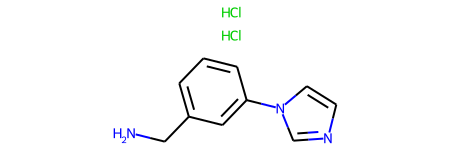

In [68]:
Chem.MolFromSmiles(smiles[26])

In [69]:
sub_molecules = []
for smile in smiles:
    smile = Chem.MolToSmiles(Chem.MolFromSmiles(smile))
    smile = smile.replace("@", "")
    smile = smile.replace("\\", "")
    smile = smile.replace("/", "")
    sub_molecules.append(smile.split("."))

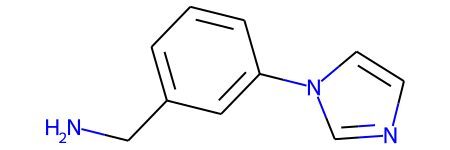

In [70]:
filtered_smiles =[]
for mol_list in sub_molecules:
    filtered_smiles.append(mol_list[np.argmax([len(x) for x in mol_list])])
    
Chem.MolFromSmiles(filtered_smiles[26])

In [71]:
dictionary = create_dict(filtered_smiles, add_tokens =True)
dictionary

{'<sos>': 0,
 '<eos>': 1,
 '<pad>': 2,
 'c': 3,
 '1': 4,
 '(': 5,
 ')': 6,
 '=': 7,
 'F': 8,
 'O': 9,
 'C': 10,
 'N': 11,
 '2': 12,
 'o': 13,
 'n': 14,
 '3': 15,
 'Cl': 16,
 's': 17,
 '-': 18,
 'H': 19,
 '[': 20,
 ']': 21,
 'S': 22,
 '#': 23,
 'P': 24}

In [72]:
tokenized_smiles = tokenize(filtered_smiles,dictionary)
tokenized_smiles

[[10, 3, 4, 3, 3, 5, 8, 6, 3, 5, 10, 5, 7, 9, 6, 9, 6, 3, 5, 8, 6, 3, 4],
 [9, 7, 10, 4, 10, 10, 5, 10, 9, 6, 5, 3, 12, 3, 3, 3, 3, 3, 12, 6, 10, 11, 4],
 [9,
  7,
  10,
  4,
  10,
  10,
  10,
  5,
  10,
  5,
  7,
  9,
  6,
  9,
  6,
  5,
  3,
  12,
  3,
  3,
  3,
  3,
  3,
  12,
  6,
  10,
  11,
  4],
 [10, 4, 10, 9, 10, 12, 10, 10, 11, 10, 10, 12, 10, 4],
 [10, 10, 4, 5, 10, 6, 10, 10, 10, 10, 10, 4, 10, 5, 7, 9, 6, 9],
 [11, 3, 4, 3, 3, 5, 10, 5, 8, 6, 5, 8, 6, 8, 6, 14, 13, 4],
 [10, 9, 10, 4, 5, 10, 6, 10, 10, 5, 11, 6, 10, 4, 5, 10, 6, 10],
 [10, 14, 4, 14, 3, 5, 10, 12, 10, 10, 12, 6, 3, 3, 4, 11],
 [9, 7, 10, 5, 9, 6, 3, 4, 3, 14, 13, 3, 4, 10, 4, 10, 10, 4],
 [9,
  7,
  10,
  4,
  10,
  10,
  12,
  5,
  10,
  3,
  15,
  3,
  3,
  3,
  3,
  3,
  15,
  10,
  12,
  6,
  10,
  5,
  7,
  9,
  6,
  11,
  4],
 [9, 7, 10, 5, 9, 6, 10, 11, 4, 10, 10, 3, 12, 3, 3, 3, 3, 3, 12, 10, 4, 7, 9],
 [10, 14, 4, 14, 3, 3, 12, 3, 3, 5, 10, 10, 5, 7, 9, 6, 9, 6, 3, 3, 3, 12, 4],
 [10, 10, 10, 5, 1

In [73]:
token_lengths = np.array([len(x) for x in tokenized_smiles])
max_length=max(token_lengths)
max_length

34

(array([  1.,  22.,   9.,  97.,  89., 126., 169., 210., 178., 161., 176.,
        138.,   0., 141., 112.,  98.,  70.,  53.,  33.,  15.,  10.,   9.,
          1.,   1.,   1.]),
 array([11.  , 11.92, 12.84, 13.76, 14.68, 15.6 , 16.52, 17.44, 18.36,
        19.28, 20.2 , 21.12, 22.04, 22.96, 23.88, 24.8 , 25.72, 26.64,
        27.56, 28.48, 29.4 , 30.32, 31.24, 32.16, 33.08, 34.  ]),
 <BarContainer object of 25 artists>)

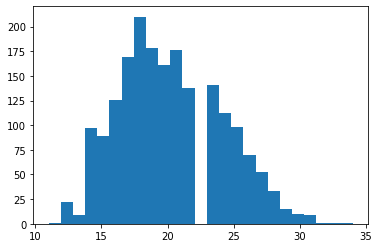

In [74]:
plt.hist(token_lengths, bins=25)

In [75]:
np.sum(token_lengths>24)

291

In [76]:
filtered_smiles=np.array(filtered_smiles)[token_lengths<=24].tolist()
len(filtered_smiles)

1629

In [77]:
dictionary = create_dict(filtered_smiles, add_tokens =True)
dictionary

{'<sos>': 0,
 '<eos>': 1,
 '<pad>': 2,
 'c': 3,
 '1': 4,
 '(': 5,
 ')': 6,
 '=': 7,
 'F': 8,
 'O': 9,
 'C': 10,
 'N': 11,
 '2': 12,
 'o': 13,
 'n': 14,
 'Cl': 15,
 's': 16,
 '-': 17,
 'H': 18,
 '[': 19,
 ']': 20,
 '3': 21,
 'S': 22,
 '#': 23}

In [78]:
tokenized_smiles = tokenize(filtered_smiles,dictionary, add_tokens =True)
tokenized_smiles

[[0, 10, 3, 4, 3, 3, 5, 8, 6, 3, 5, 10, 5, 7, 9, 6, 9, 6, 3, 5, 8, 6, 3, 4, 1],
 [0,
  9,
  7,
  10,
  4,
  10,
  10,
  5,
  10,
  9,
  6,
  5,
  3,
  12,
  3,
  3,
  3,
  3,
  3,
  12,
  6,
  10,
  11,
  4,
  1],
 [0, 10, 4, 10, 9, 10, 12, 10, 10, 11, 10, 10, 12, 10, 4, 1],
 [0, 10, 10, 4, 5, 10, 6, 10, 10, 10, 10, 10, 4, 10, 5, 7, 9, 6, 9, 1],
 [0, 11, 3, 4, 3, 3, 5, 10, 5, 8, 6, 5, 8, 6, 8, 6, 14, 13, 4, 1],
 [0, 10, 9, 10, 4, 5, 10, 6, 10, 10, 5, 11, 6, 10, 4, 5, 10, 6, 10, 1],
 [0, 10, 14, 4, 14, 3, 5, 10, 12, 10, 10, 12, 6, 3, 3, 4, 11, 1],
 [0, 9, 7, 10, 5, 9, 6, 3, 4, 3, 14, 13, 3, 4, 10, 4, 10, 10, 4, 1],
 [0,
  9,
  7,
  10,
  5,
  9,
  6,
  10,
  11,
  4,
  10,
  10,
  3,
  12,
  3,
  3,
  3,
  3,
  3,
  12,
  10,
  4,
  7,
  9,
  1],
 [0,
  10,
  14,
  4,
  14,
  3,
  3,
  12,
  3,
  3,
  5,
  10,
  10,
  5,
  7,
  9,
  6,
  9,
  6,
  3,
  3,
  3,
  12,
  4,
  1],
 [0, 10, 10, 10, 5, 11, 6, 10, 4, 10, 10, 9, 10, 10, 4, 1],
 [0, 11, 10, 5, 7, 9, 6, 3, 4, 3, 3, 3, 3, 5, 10, 9

In [79]:
token_lengths = np.array([len(x) for x in tokenized_smiles])
max_length=max(token_lengths)
max_length

26

In [80]:
for i, tok_smi in enumerate(tokenized_smiles):
    tokenized_smiles[i] = tok_smi+ [dictionary["<pad>"]]*(max_length - token_lengths[i])

In [81]:
tokenized_smiles=torch.tensor(tokenized_smiles, dtype=torch.long)
tokenized_smiles

tensor([[ 0, 10,  3,  ...,  4,  1,  2],
        [ 0,  9,  7,  ...,  4,  1,  2],
        [ 0, 10,  4,  ...,  2,  2,  2],
        ...,
        [ 0,  9,  7,  ...,  4,  1,  2],
        [ 0, 10, 14,  ...,  2,  2,  2],
        [ 0, 10, 10,  ...,  2,  2,  2]])

RDKit WARNING: [13:08:25] WARNING: not removing hydrogen atom without neighbors
[13:08:25] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:25] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:25] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:25] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:25] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:25] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:25] WARNING: not removing hydrogen atom without neighbors
[13:08:25] WARNING: not removing hydrogen atom without neighbors
[13:08:25] WARNING: not removing hydrogen atom without neighbors
[13:08:25] WARNING: not removing hydrogen atom without neighbors
[13:08:25] WARNING: not removing hydrogen atom without neighbors
[13:08:25] WARNING: not removing hydrogen atom without neighbors
[13:08:25] WARNING: not removing hydrogen atom wit

RDKit WARNING: [13:08:27] WARNING: not removing hydrogen atom without neighbors
[13:08:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:27] WARNING: not removing hydrogen atom without neighbors
[13:08:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:27] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:27] WARNING: not removing hydrogen atom without 

RDKit WARNING: [13:08:30] WARNING: not removing hydrogen atom without neighbors
[13:08:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:30] WARNING: not removing hydrogen atom without neighbors
[13:08:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:30] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:30] WARNING: not removing hydrogen atom without 

RDKit WARNING: [13:08:31] WARNING: not removing hydrogen atom without neighbors
[13:08:31] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:32] WARNING: not removing hydrogen atom without neighbors
[13:08:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:32] WARNING: not removing hydrogen atom without neighbors
[13:08:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:32] WARNING: not removing hydrogen atom without neighbors
[13:08:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:08:32] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [13:0

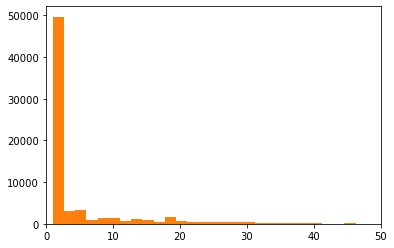

In [2]:
data = pd.read_csv("../data/carbon/carbon.tab", sep="\t", header =None).iloc[:,1].tolist()

sub_molecules = []
for smile in data:
    smile = Chem.MolToSmiles(Chem.MolFromSmiles(smile))
    smile = smile.replace("@", "")
    smile = smile.replace("\\", "")
    smile = smile.replace("/", "")
    sub_molecules.append(smile.split("."))


extracted_smiles = [smile for x in sub_molecules for smile in x]
len(extracted_smiles)


num_atoms = [Chem.MolFromSmiles(smile).GetNumAtoms() for smile in extracted_smiles]

plt.hist(num_atoms,200)
plt.xlim([0,50])


plt.hist(num_atoms,200)

mols_5_atoms = list(np.array(extracted_smiles)[(np.array(num_atoms)>=5) & (np.array(num_atoms)<20)])
mols_5_atoms = [Chem.MolToSmiles(Chem.MolFromSmiles(smile)) for smile in mols_5_atoms]

mols_5_atoms = pd.DataFrame(mols_5_atoms).drop_duplicates()
mols_5_atoms = mols_5_atoms.iloc[:,0].values.tolist() 


In [3]:
len(mols_5_atoms)

4709

In [4]:
dictionary = create_dict(mols_5_atoms)
dictionary

{'H': 0,
 ']': 1,
 '=': 2,
 'N': 3,
 '2': 4,
 '[': 5,
 'C': 6,
 '+': 7,
 'S': 8,
 'c': 9,
 '-': 10,
 '1': 11,
 'n': 12,
 '(': 13,
 ')': 14,
 'O': 15,
 'F': 16,
 'e': 17,
 'P': 18,
 '#': 19,
 'B': 20,
 '3': 21,
 '4': 22,
 'o': 23,
 'Cl': 24,
 'Br': 25,
 'I': 26,
 'Si': 27,
 'b': 28,
 'A': 29,
 's': 30,
 'G': 31,
 'l': 32,
 'r': 33,
 'W': 34,
 'g': 35,
 'Cr': 36,
 'M': 37,
 'p': 38,
 'R': 39,
 'h': 40,
 'u': 41,
 'a': 42,
 'T': 43,
 'i': 44}

In [7]:
atom_types_rm=["As", "Ge","Re","Se", "Fe","Sb", "Ge", "Pb","Hg", "Rh",
               "Ru", "W", "Ga","Ir", "Ta", "Mo", "Mn", "Pt", "Al", "Ni",
               "Bi", "Rh", "Pb" "Sb", "Te", "Sn"]

In [8]:
filterd_smiles = []
for smile in mols_5_atoms:
        if all([atom not in smile for atom in atom_types_rm]):
            filterd_smiles.append(smile)

In [9]:
len(mols_5_atoms)-len(filterd_smiles)

278

In [10]:
dictionary = create_dict(filterd_smiles)
dictionary

{'H': 0,
 ']': 1,
 '=': 2,
 'N': 3,
 '2': 4,
 '[': 5,
 'C': 6,
 '+': 7,
 'S': 8,
 'c': 9,
 '-': 10,
 '1': 11,
 'n': 12,
 '(': 13,
 ')': 14,
 'O': 15,
 'F': 16,
 'P': 17,
 '#': 18,
 'B': 19,
 '3': 20,
 '4': 21,
 'o': 22,
 'Cl': 23,
 'Br': 24,
 'I': 25,
 'Si': 26,
 's': 27,
 'Cr': 28,
 'p': 29}

In [11]:
tokenized_smiles = tokenize(filterd_smiles,dictionary)
tokenized_smiles

[[5, 8, 0, 4, 7, 1, 6, 2, 3, 6, 5, 8, 0, 4, 7, 1],
 [6, 9, 11, 9, 9, 9, 5, 9, 0, 10, 1, 11],
 [6,
  15,
  9,
  11,
  9,
  9,
  12,
  9,
  13,
  6,
  9,
  4,
  9,
  9,
  9,
  5,
  9,
  0,
  10,
  1,
  4,
  14,
  9,
  11],
 [6, 9, 11, 9, 9, 9, 9, 13, 6, 9, 4, 9, 9, 9, 5, 9, 0, 10, 1, 4, 14, 12, 11],
 [9, 11, 9, 9, 9, 13, 6, 9, 4, 9, 9, 9, 5, 9, 0, 10, 1, 4, 14, 12, 9, 11],
 [6,
  15,
  9,
  11,
  9,
  9,
  9,
  9,
  13,
  6,
  9,
  4,
  9,
  9,
  9,
  5,
  9,
  0,
  10,
  1,
  4,
  14,
  12,
  11],
 [16,
  6,
  13,
  16,
  14,
  13,
  16,
  14,
  9,
  11,
  9,
  9,
  9,
  13,
  6,
  9,
  4,
  9,
  9,
  9,
  5,
  9,
  0,
  10,
  1,
  4,
  14,
  12,
  9,
  11],
 [15,
  2,
  6,
  13,
  5,
  15,
  10,
  1,
  14,
  15,
  6,
  11,
  13,
  15,
  6,
  13,
  2,
  15,
  14,
  5,
  15,
  10,
  1,
  14,
  15,
  6,
  13,
  2,
  15,
  14,
  15,
  11],
 [6, 6, 3, 6, 6],
 [6, 6, 6, 13, 3, 14, 3, 13, 6, 14, 6],
 [6, 3, 13, 6, 14, 6, 6, 6, 3],
 [6, 6, 6, 3, 3, 13, 6, 14, 6],
 [15,
  2,
  6,
  13,
  6,
  2

In [12]:
token_lengths = np.array([len(x) for x in tokenized_smiles])

In [13]:
max(token_lengths)

61

In [14]:
np.sum(token_lengths>30)

742

In [15]:
filterd_smiles=np.array(filterd_smiles)[token_lengths<=30].tolist()

In [16]:
dictionary = create_dict(filterd_smiles)
dictionary

{'H': 0,
 ']': 1,
 '=': 2,
 'N': 3,
 '2': 4,
 '[': 5,
 'C': 6,
 '+': 7,
 'S': 8,
 'c': 9,
 '-': 10,
 '1': 11,
 'n': 12,
 '(': 13,
 ')': 14,
 'O': 15,
 'F': 16,
 'P': 17,
 '#': 18,
 'B': 19,
 '3': 20,
 '4': 21,
 'o': 22,
 'Cl': 23,
 'Br': 24,
 'I': 25,
 'Si': 26,
 's': 27,
 'Cr': 28,
 'p': 29}

In [17]:
tokenized_smiles = tokenize(filterd_smiles,dictionary)
tokenized_smiles

[[5, 8, 0, 4, 7, 1, 6, 2, 3, 6, 5, 8, 0, 4, 7, 1],
 [6, 9, 11, 9, 9, 9, 5, 9, 0, 10, 1, 11],
 [6,
  15,
  9,
  11,
  9,
  9,
  12,
  9,
  13,
  6,
  9,
  4,
  9,
  9,
  9,
  5,
  9,
  0,
  10,
  1,
  4,
  14,
  9,
  11],
 [6, 9, 11, 9, 9, 9, 9, 13, 6, 9, 4, 9, 9, 9, 5, 9, 0, 10, 1, 4, 14, 12, 11],
 [9, 11, 9, 9, 9, 13, 6, 9, 4, 9, 9, 9, 5, 9, 0, 10, 1, 4, 14, 12, 9, 11],
 [6,
  15,
  9,
  11,
  9,
  9,
  9,
  9,
  13,
  6,
  9,
  4,
  9,
  9,
  9,
  5,
  9,
  0,
  10,
  1,
  4,
  14,
  12,
  11],
 [16,
  6,
  13,
  16,
  14,
  13,
  16,
  14,
  9,
  11,
  9,
  9,
  9,
  13,
  6,
  9,
  4,
  9,
  9,
  9,
  5,
  9,
  0,
  10,
  1,
  4,
  14,
  12,
  9,
  11],
 [6, 6, 3, 6, 6],
 [6, 6, 6, 13, 3, 14, 3, 13, 6, 14, 6],
 [6, 3, 13, 6, 14, 6, 6, 6, 3],
 [6, 6, 6, 3, 3, 13, 6, 14, 6],
 [15,
  2,
  6,
  13,
  6,
  2,
  6,
  13,
  15,
  14,
  6,
  13,
  16,
  14,
  13,
  16,
  14,
  16,
  14,
  6,
  13,
  16,
  14,
  13,
  16,
  14,
  16],
 [6, 6, 13, 2, 15, 14, 6, 2, 6, 13, 15, 14, 6, 13, 16, 1

In [18]:
token_lengths = np.array([len(x) for x in tokenized_smiles])
max_length=max(token_lengths)
max_length

30

In [20]:
dictionary = create_dict(filterd_smiles, add_tokens =True)
dictionary

{'<sos>': 0,
 '<eos>': 1,
 '<pad>': 2,
 'C': 3,
 ']': 4,
 'H': 5,
 '=': 6,
 '2': 7,
 '[': 8,
 'N': 9,
 '+': 10,
 'S': 11,
 'c': 12,
 '-': 13,
 '1': 14,
 'n': 15,
 '(': 16,
 ')': 17,
 'O': 18,
 'F': 19,
 'P': 20,
 '#': 21,
 'B': 22,
 '3': 23,
 '4': 24,
 'o': 25,
 'Cl': 26,
 'Br': 27,
 'I': 28,
 'Si': 29,
 's': 30,
 'Cr': 31,
 'p': 32}

In [21]:
tokenized_smiles = tokenize(filterd_smiles,dictionary,add_tokens=True )
tokenized_smiles[:2]

[[0, 8, 11, 5, 7, 10, 4, 3, 6, 9, 3, 8, 11, 5, 7, 10, 4, 1],
 [0, 3, 12, 14, 12, 12, 12, 8, 12, 5, 13, 4, 14, 1]]

In [22]:
for i, tok_smi in enumerate(tokenized_smiles):
    tokenized_smiles[i] = tok_smi+ [dictionary["<pad>"]]*(max_length - token_lengths[i])

In [23]:
tokenized_smiles=torch.tensor(tokenized_smiles, dtype=torch.long)
tokenized_smiles

tensor([[ 0,  8, 11,  ...,  2,  2,  2],
        [ 0,  3, 12,  ...,  2,  2,  2],
        [ 0,  3, 18,  ...,  2,  2,  2],
        ...,
        [ 0,  3,  3,  ..., 14,  1,  2],
        [ 0, 18,  6,  ...,  2,  2,  2],
        [ 0,  3,  3,  ...,  2,  2,  2]])

In [102]:
class Encoder(nn.Module):
    def __init__(self, input_dim, emb_dim, hid_dim, dropout):
        super().__init__()

        self.hid_dim = hid_dim
        
        self.embedding = nn.Embedding(input_dim, emb_dim,  padding_idx=2) #no dropout as only one layer!
        
        self.rnn = nn.GRU(emb_dim, hid_dim)
        
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x):
        embedded = self.dropout(self.embedding(x))
        embedded = embedded.permute(1,0,2)
        _ , hidden = self.rnn(embedded)
        return hidden

In [137]:
enc = Encoder(26,64,256,0.2)

In [138]:
hidden = enc(ex_in)

In [143]:
dec = Decoder(26,64,256,0.2)

In [210]:
input = ex_in[:,0] 
output, hidden = dec(input, hidden)

In [227]:
output.argmax(2).squeeze().shape



torch.Size([16])

In [126]:
ex_in[:,0]

tensor([ 0, 11, 10,  5,  7,  9,  6,  3,  4,  3,  3,  3,  3,  5, 10,  9,  6,  3,
         4,  1,  2,  2,  2,  2,  2,  2])

In [186]:
class Decoder(nn.Module):
    def __init__(self, output_dim, emb_dim, hid_dim, dropout):
        super().__init__()

        self.hid_dim = hid_dim
        self.output_dim = output_dim
        self.embedding = nn.Embedding(output_dim, emb_dim,padding_idx=2)
        self.rnn = nn.GRU(emb_dim, hid_dim)
        self.fc = nn.Linear(hid_dim, output_dim)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, input, hidden):
        
        input = input.unsqueeze(1)
        
        embedded = self.dropout(self.embedding(input))
        embedded = embedded.permute(1,0,2)        
        output, hidden = self.rnn(embedded, hidden)
        output = self.fc(output)
        return output, hidden
        
    

In [315]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super().__init__()
        
        self.encoder = encoder
        self.decoder = decoder
        self.device = device
        
        assert encoder.hid_dim == decoder.hid_dim, \
            "Hidden dimensions of encoder and decoder must be equal!"
        
    def forward(self, src, trg, teacher_forcing_ratio = 0.5):
   
        
        batch_size = trg.shape[0]
        trg_len = trg.shape[1]
        trg_vocab_size = self.decoder.output_dim
        outputs = torch.zeros(trg_len, batch_size, trg_vocab_size).to(self.device)
        
        hidden = self.encoder(src)
        
        input_ = trg[:,0]
        print(input_.shape)
        for t in range(1, trg_len):
            print(input_.shape)
            output, hidden = self.decoder(input_, hidden)
            
            #place predictions in a tensor holding predictions for each token
            outputs[t] = output
            
            #decide if we are going to use teacher forcing or not
            teacher_force = random.random() < teacher_forcing_ratio
            
            #get the highest predicted token from our predictions
            top1 = output.argmax(2).squeeze()
            print(top1)
            #if teacher forcing, use actual next token as next input
            #if not, use predicted token
            input_ = trg[:,t] if teacher_force else top1


        return outputs

In [316]:
enc = Encoder(len(dictionary), 128, 256, 0.2)
dec = Decoder(len(dictionary),128,256,0.2)
model = Seq2Seq(enc, dec, "cpu")

In [317]:
train_dataset = TensorDataset(tokenized_smiles, tokenized_smiles)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
ex_in, ex_out = next(iter(train_loader))

In [318]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_funktion = nn.CrossEntropyLoss(ignore_index = dictionary["<pad>"])

In [319]:
ex_in[0:1][:,0].unsqueeze(1)

tensor([[0]])

In [320]:
for epoch in range(100):
    model.train()
    epoch_loss = 0
    input_seq = ex_in[0:1]
    output_seq = ex_in[0:1]
    for p in range(20):

        optimizer.zero_grad()

        output = model(input_seq, output_seq,0.5)
        output_dim = output.shape[-1]

        output = output[1:].view(-1, output_dim)
        output_seq_r = output_seq[:,1:].reshape(-1)
        loss = loss_funktion(output, output_seq_r)
        
        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()

    print(f"Epoch {epoch}: Loss: {epoch_loss /20}")

torch.Size([1])
torch.Size([1])
tensor(16)
torch.Size([])


IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [289]:
output.shape
output_seq.shape

torch.Size([2, 26])

In [281]:
output.shape

torch.Size([49, 24])

In [233]:
for epoch in range(30):
    model.train()
    epoch_loss = 0

    for input_seq, output_seq in train_loader:

        optimizer.zero_grad()

        output = model(input_seq, output_seq)
        output_dim = output.shape[-1]

        output = output[1:].view(-1, output_dim)
        output_seq = output_seq[:,1:].reshape(-1)
        loss = loss_funktion(output, output_seq)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()

    print(f"Epoch {epoch}: Loss: {epoch_loss / len(train_loader)}")

KeyboardInterrupt: 

In [263]:
model.train()

Seq2Seq(
  (encoder): Encoder(
    (embedding): Embedding(24, 128, padding_idx=2)
    (rnn): GRU(128, 256)
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (decoder): Decoder(
    (embedding): Embedding(24, 128, padding_idx=2)
    (rnn): GRU(128, 256)
    (fc): Linear(in_features=256, out_features=24, bias=True)
    (dropout): Dropout(p=0.2, inplace=False)
  )
)

In [273]:
 model(ex_in[:2], ex_in[:2], 0,)

tensor([[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[-3.3099, -5.0851, -3.2600,  ..., -2.7156, -3.0879, -3.4688],
         [-0.5289, -0.6063, -0.1107,  ..., -0.7652, -0.8306, -0.4475]],

        [[-4.2381, -4.7992, -4.6084,  ..., -3.6342, -4.2082, -4.5653],
         [-0.7493, -0.1477, -0.5628,  ..., -1.2417, -1.2573, -0.8296]],

        ...,

        [[-1.3637, 12.8442, -0.7322,  ..., -0.7947, -1.2117, -1.8179],
         [-3.0633, -0.7481, -2.7831,  ..., -2.5956, -2.8110, -2.6700]],

        [[-0.5892,  8.8501, -0.8478,  ..., -0.4658, -0.5504, -1.1139],
         [-3.1602, -3.8321, -3.0095,  ..., -2.3468, -3.0322, -3.3867]],

        [[-0.1327,  7.0959, -0.8675,  ...,  0.1257, -0.3761, -0.7793],
         [-2.8890, -4.4160, -2.5345,  ..., -2.2997, -2.9089, -2.9038]]],
       grad_fn=<CopySlices>)

In [274]:
pred = model(ex_in[:2], ex_in[:2], 0.)

In [275]:
torch.argmax(pred,2).t()

tensor([[ 0, 10, 10, 10, 10, 10, 10, 11, 10,  6,  4,  4,  3, 19, 11, 10, 11, 10,
          3, 14,  3, 14, 20,  1,  1,  1],
        [ 0,  4,  9,  5,  9, 12, 10, 10, 12, 10,  1, 12, 10, 10,  4, 10, 10,  4,
          4,  3, 19, 18,  4,  3, 19, 18]])

In [262]:
ex_in[:2]

tensor([[ 0, 10,  4, 10,  9, 10,  5, 10,  9, 10, 12, 10, 10, 11, 10, 10, 12,  6,
         10,  4,  1,  2,  2,  2,  2,  2],
        [ 0, 10, 11,  4, 10, 10, 11, 10, 10,  4,  3,  4, 14,  3,  3, 19, 14, 18,
         20,  4,  1,  2,  2,  2,  2,  2]])

In [245]:
dictionary

{'<sos>': 0,
 '<eos>': 1,
 '<pad>': 2,
 'c': 3,
 '1': 4,
 '(': 5,
 ')': 6,
 '=': 7,
 'F': 8,
 'O': 9,
 'C': 10,
 'N': 11,
 '2': 12,
 'o': 13,
 'n': 14,
 'Cl': 15,
 's': 16,
 '-': 17,
 'H': 18,
 '[': 19,
 ']': 20,
 '3': 21,
 'S': 22,
 '#': 23}